# Data Exploration

Import the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
from tqdm.auto import tqdm
tqdm.pandas()

Load data

In [2]:
df = pd.read_csv('C:/Users/anagh/Documents/myProject/2023-amse-AnaghaTamhankar/data/finalData.csv')
# drop the combined column with both latitide and longitude
df.drop(columns=['latAndlong'], inplace=True)

Change to desirable datatypes

In [3]:
dtype_dict = {'datum_von': 'datetime64[ns]', 
              'kennzeichen1': 'category',  
              'fahrzeugart': 'category',  
              'fabrikat': 'category', 
              'X': float,
              'Y': float,
              'LSA_Nr': 'category',
              'Standort': str,
              'LSA_X': float,
              'LSA_Y': float,
              'zipcode': 'category'}
df = df.astype(dtype_dict)
df['monat'] = df['datum_von'].dt.month

In [4]:
df.head()

datum_von kennzeichen1 fahrzeugart fabrikat          Y         X  \
0 2021-01-14 08:32:00           MG         PKW     FIAT  50.931636  6.937065   
1 2021-01-14 08:32:00         LU 7         PKW     OPEL  50.931636  6.937065   
2 2021-01-14 10:25:00            K         PKW    DACIA  50.931636  6.937065   
3 2021-01-14 10:25:00            K         PKW     FORD  50.931636  6.937065   
4 2021-01-14 08:32:00           MG         PKW     FIAT  50.931636  6.937065   

  LSA_Nr                                      Standort     LSA_X      LSA_Y  \
0   1458  Roonstraße / Beethovenstraße / Rathenauplatz  6.936945  50.931568   
1   1458  Roonstraße / Beethovenstraße / Rathenauplatz  6.936945  50.931568   
2   1458  Roonstraße / Beethovenstraße / Rathenauplatz  6.936945  50.931568   
3   1458  Roonstraße / Beethovenstraße / Rathenauplatz  6.936945  50.931568   
4   1458  Roonstraße / Beethovenstraße / Rathenauplatz  6.936945  50.931568   

  zipcode  monat  
0   50674      1  
1   50674      1  
2   50674      1  
3   50674      1  
4   50674      1

### Data exploration
Print some basic information about the data. Your data exploration would continue here.

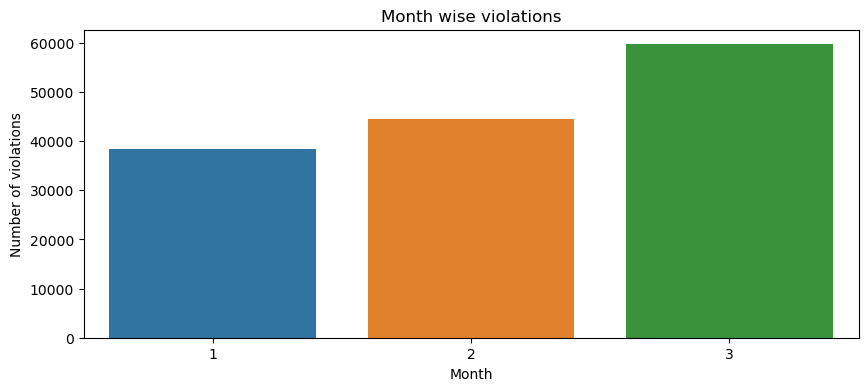

In [5]:
plt.figure(figsize=(10,4))
plt.title("Month wise violations")
sns.countplot(x='monat', data=df)
plt.xlabel("Month")
plt.ylabel("Number of violations")
plt.show()

Get the Spatial plot of all viiolation locations vs the location of the trafic lights in the city of Koln

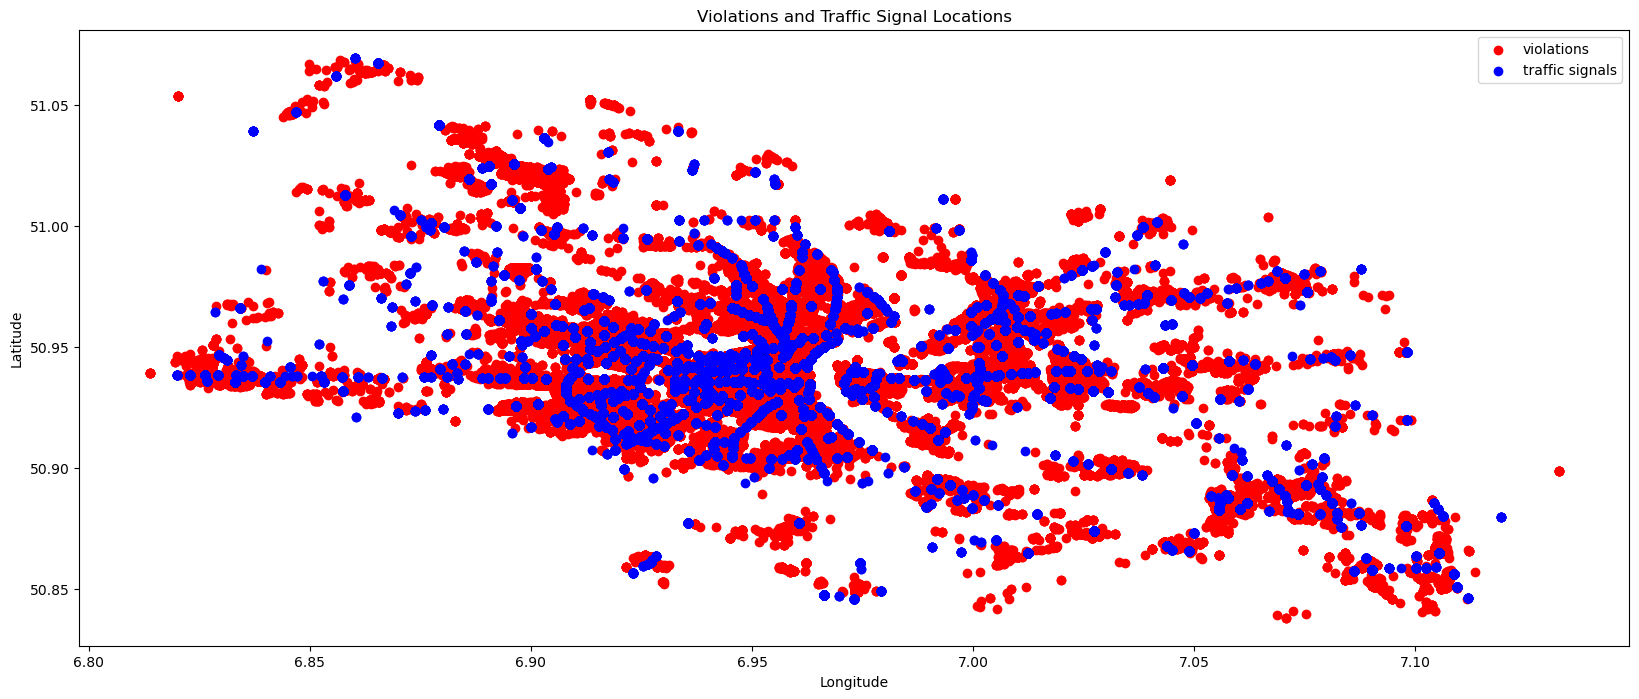

In [6]:
plt.figure(figsize=(20,8))
v = plt.scatter(df['X'], df['Y'], color= 'red')
t = plt.scatter(df['LSA_X'], df['LSA_Y'], color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Violations and Traffic Signal Locations')
plt.legend((v, t), ('violations', 'traffic signals'), loc = 'best')
plt.show()


In [7]:
def get_distance(row):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(row['Y'])
    lon2 = radians(row['LSA_Y'])
    lat1 = radians(row['X'])
    lat2 = radians(row['LSA_X'])
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)


In [8]:
df['distance'] = df.progress_apply(lambda r: get_distance(r), axis = 1)

  0%|          | 0/142491 [00:00<?, ?it/s]

In [9]:
df.head()

datum_von kennzeichen1 fahrzeugart fabrikat          Y         X  \
0 2021-01-14 08:32:00           MG         PKW     FIAT  50.931636  6.937065   
1 2021-01-14 08:32:00         LU 7         PKW     OPEL  50.931636  6.937065   
2 2021-01-14 10:25:00            K         PKW    DACIA  50.931636  6.937065   
3 2021-01-14 10:25:00            K         PKW     FORD  50.931636  6.937065   
4 2021-01-14 08:32:00           MG         PKW     FIAT  50.931636  6.937065   

  LSA_Nr                                      Standort     LSA_X      LSA_Y  \
0   1458  Roonstraße / Beethovenstraße / Rathenauplatz  6.936945  50.931568   
1   1458  Roonstraße / Beethovenstraße / Rathenauplatz  6.936945  50.931568   
2   1458  Roonstraße / Beethovenstraße / Rathenauplatz  6.936945  50.931568   
3   1458  Roonstraße / Beethovenstraße / Rathenauplatz  6.936945  50.931568   
4   1458  Roonstraße / Beethovenstraße / Rathenauplatz  6.936945  50.931568   

  zipcode  monat  distance  
0   50674      1  0.015286  
1   50674      1  0.015286  
2   50674      1  0.015286  
3   50674      1  0.015286  
4   50674      1  0.015286

In [10]:
zipcode_data = df.groupby('zipcode').agg(
    LSA_Nr_count=('LSA_Nr', 'nunique'),
    violation_count=('LSA_Nr', 'size'),
    mean_distance=('distance', 'mean')
).reset_index()
zipcode_data.head()

zipcode  LSA_Nr_count  violation_count  mean_distance
0   50667            48            10088       0.145546
1   50668            40             5915       0.141949
2   50670            43             5682       0.125344
3   50672            39             5453       0.100800
4   50674            50             6328       0.101850

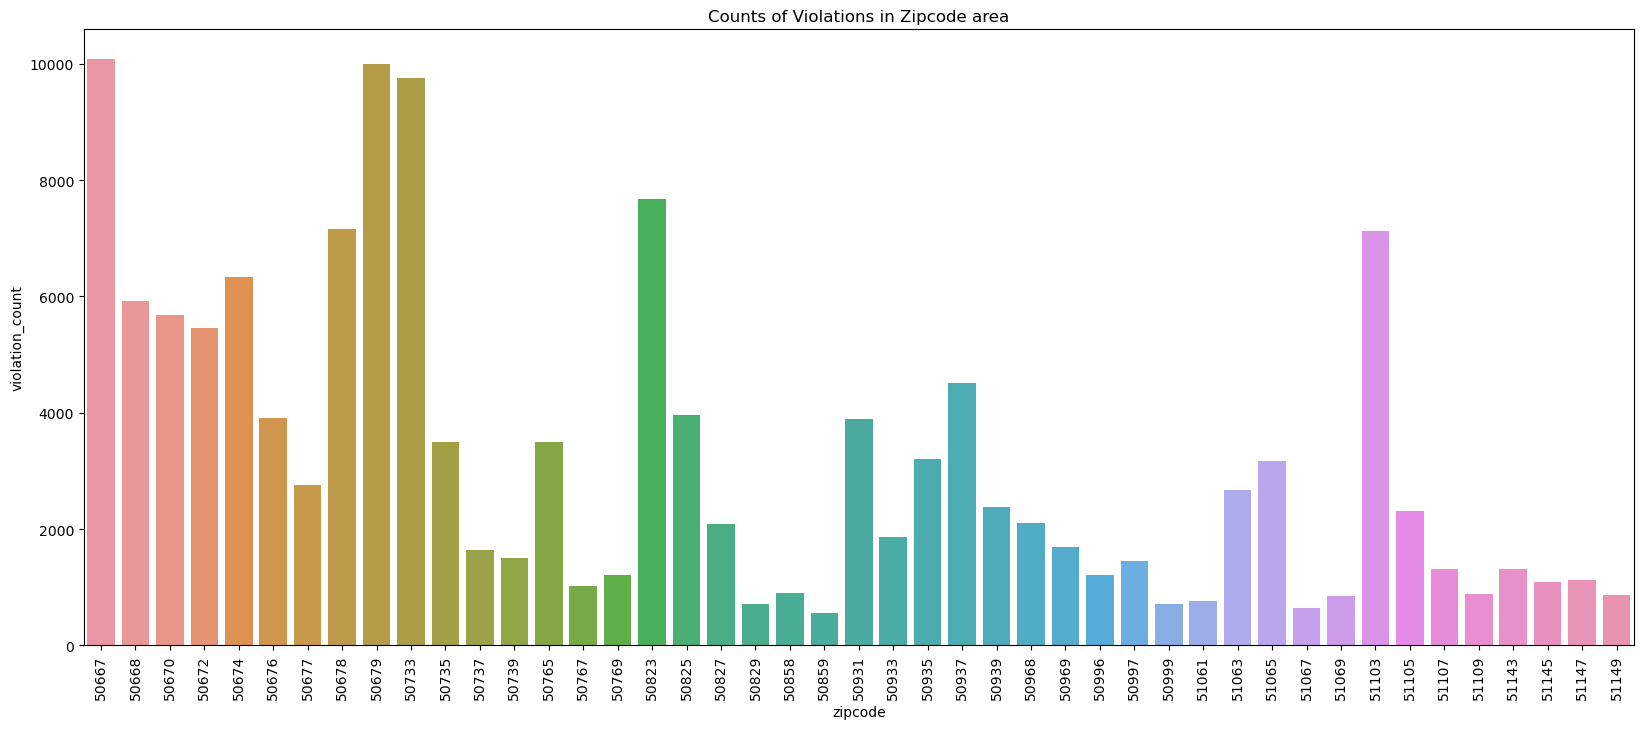

In [11]:
plt.figure(figsize=(20,8))
sns.barplot(x='zipcode', y='violation_count', data=zipcode_data)
plt.xticks(rotation=90)
plt.title('Counts of Violations in Zipcode area')
plt.show()

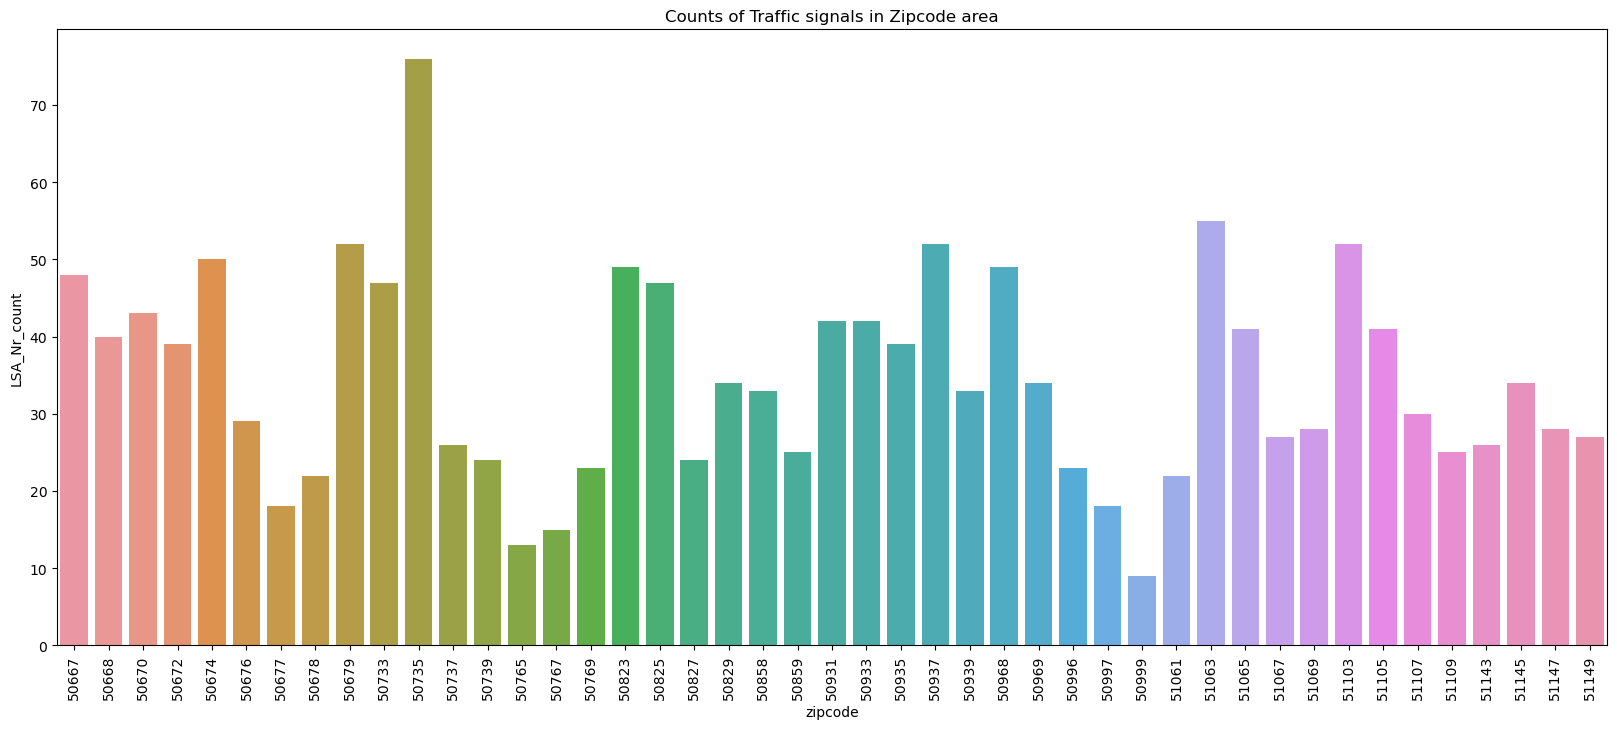

In [12]:
plt.figure(figsize=(20,8))
sns.barplot(x='zipcode', y='LSA_Nr_count', data=zipcode_data)
plt.xticks(rotation=90)
plt.title('Counts of Traffic signals in Zipcode area')
plt.show()

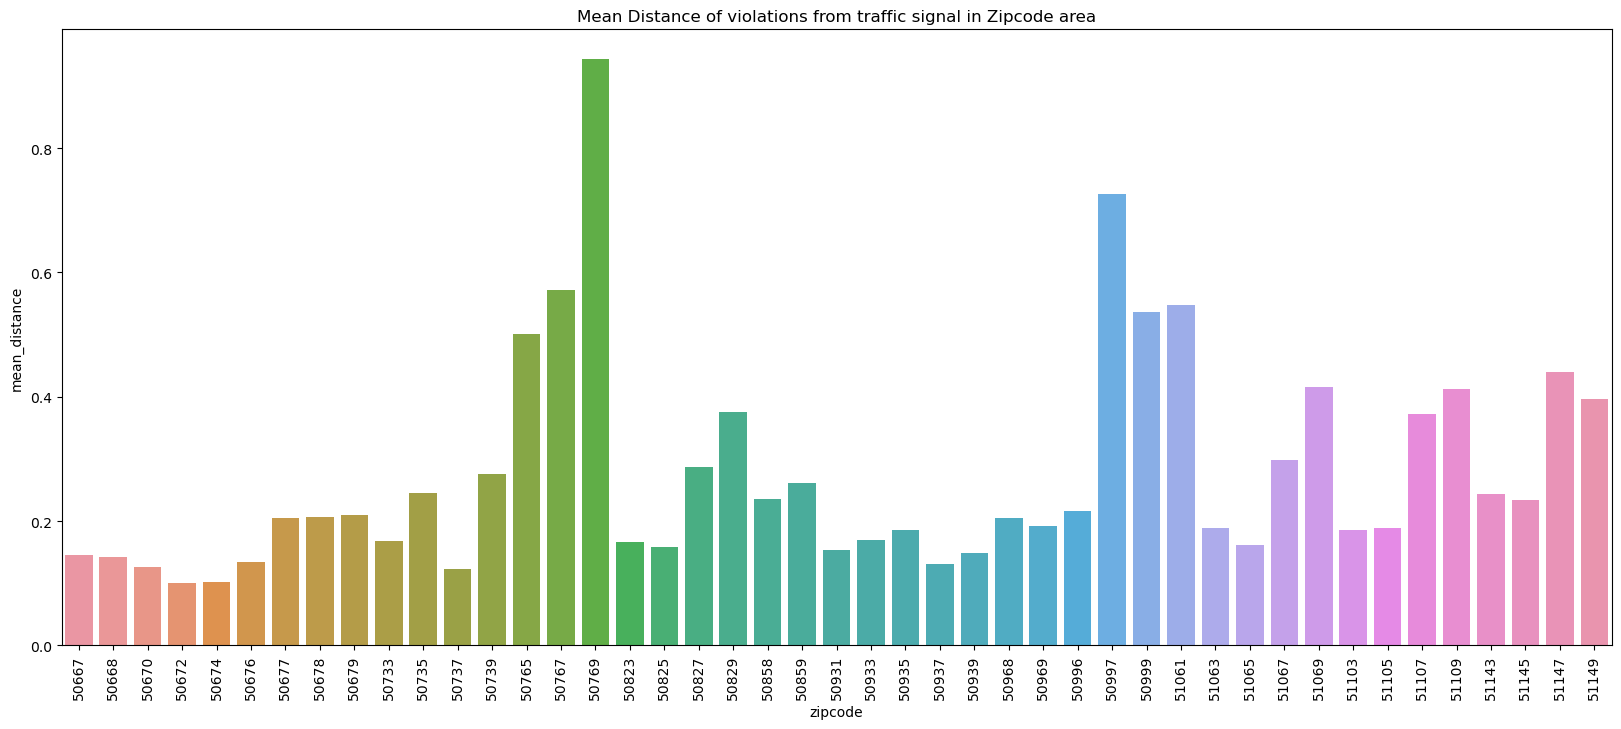

In [13]:
plt.figure(figsize=(20,8))
sns.barplot(x='zipcode', y='mean_distance', data=zipcode_data)
plt.xticks(rotation=90)
plt.title('Mean Distance of violations from traffic signal in Zipcode area')
plt.show()

In [14]:
zipcode_data.to_csv('C:/Users/anagh/Documents/myProject/2023-amse-AnaghaTamhankar/data/zipcode_data.csv', index= False)